<a href="https://colab.research.google.com/github/jocker1854/Machine-Learning-Projects/blob/main/Project_10_ImageClassificationCIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

### Transforms

In [2]:
# Transform: Normalize images between -1 and 1
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

### Downloading Data

In [3]:
# Download training and test data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

100%|██████████| 170M/170M [00:13<00:00, 13.0MB/s]


In [4]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

In [6]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

### Defining Classes

In [7]:
classes = trainset.classes

### Creating the model archiecture

In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

### Training the model

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10

In [14]:


for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for batch, (images, labels) in enumerate(trainloader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if batch % 100 == 0:    # print every 100 mini-batches
          print(f"Epoch {epoch+1}, Batch: {batch} Loss: {running_loss / len(trainloader):.3f}")


Epoch 1, Batch: 0 Loss: 0.001
Epoch 1, Batch: 100 Loss: 0.108
Epoch 1, Batch: 200 Loss: 0.214
Epoch 1, Batch: 300 Loss: 0.318
Epoch 1, Batch: 400 Loss: 0.422
Epoch 1, Batch: 500 Loss: 0.525
Epoch 1, Batch: 600 Loss: 0.631
Epoch 1, Batch: 700 Loss: 0.731
Epoch 2, Batch: 0 Loss: 0.001
Epoch 2, Batch: 100 Loss: 0.082
Epoch 2, Batch: 200 Loss: 0.162
Epoch 2, Batch: 300 Loss: 0.242
Epoch 2, Batch: 400 Loss: 0.321
Epoch 2, Batch: 500 Loss: 0.399
Epoch 2, Batch: 600 Loss: 0.481
Epoch 2, Batch: 700 Loss: 0.565
Epoch 3, Batch: 0 Loss: 0.000
Epoch 3, Batch: 100 Loss: 0.058
Epoch 3, Batch: 200 Loss: 0.113
Epoch 3, Batch: 300 Loss: 0.174
Epoch 3, Batch: 400 Loss: 0.234
Epoch 3, Batch: 500 Loss: 0.294
Epoch 3, Batch: 600 Loss: 0.357
Epoch 3, Batch: 700 Loss: 0.419
Epoch 4, Batch: 0 Loss: 0.000
Epoch 4, Batch: 100 Loss: 0.039
Epoch 4, Batch: 200 Loss: 0.077
Epoch 4, Batch: 300 Loss: 0.116
Epoch 4, Batch: 400 Loss: 0.157
Epoch 4, Batch: 500 Loss: 0.201
Epoch 4, Batch: 600 Loss: 0.243
Epoch 4, Batch: 

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize from [-1, 1] to [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()

### Visualizing the Predictions

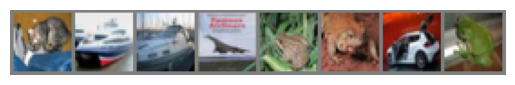

Image 1: GT = cat        | Pred = cat        | Confidence = 99.86%
Image 2: GT = ship       | Pred = ship       | Confidence = 100.00%
Image 3: GT = ship       | Pred = ship       | Confidence = 83.75%
Image 4: GT = airplane   | Pred = airplane   | Confidence = 98.43%
Image 5: GT = frog       | Pred = frog       | Confidence = 98.89%
Image 6: GT = frog       | Pred = frog       | Confidence = 100.00%
Image 7: GT = automobile | Pred = automobile | Confidence = 100.00%
Image 8: GT = frog       | Pred = deer       | Confidence = 87.95%


In [19]:
import torch.nn.functional as F

# Get a batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Get model predictions and softmax probabilities
model.eval()
with torch.no_grad():
    outputs = model(images)
    probabilities = F.softmax(outputs, dim=1)
    confidences, predicted = torch.max(probabilities, 1)

# Move to CPU for visualization
images = images.cpu()
labels = labels.cpu()
predicted = predicted.cpu()
confidences = confidences.cpu()

# Show 8 images in a grid
imshow(torchvision.utils.make_grid(images[:8]))

# Print results
for i in range(8):
    gt = classes[labels[i]]
    pred = classes[predicted[i]]
    conf = confidences[i].item() * 100
    print(f'Image {i+1}: GT = {gt:<10} | Pred = {pred:<10} | Confidence = {conf:.2f}%')
